In [5]:
import pandas as pd
import matplotlib.pyplot as plt
data2 = pd.read_csv('spend_hp_data_2.csv')

In [6]:
y = data2[['$ Spend']]
X = data2[['# Impressions']]
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
    

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

from sklearn.linear_model import LinearRegression
lreg = LinearRegression()
lreg.fit(X_train, y_train)
print('Train Score for Linear Regression:', lreg.score(X_train, y_train))
print('Test Score for Linear Regression:', lreg.score(X_test, y_test))

Train Score for Linear Regression: 0.21109049521590872
Test Score for Linear Regression: 0.21588435035244324


In [7]:
X = data2[['$ Spend']]
y = data2[['# Impressions']]
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
    

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

from sklearn.linear_model import LinearRegression
lreg = LinearRegression()
lreg.fit(X_train, y_train)
print('Train Score for Linear Regression:', lreg.score(X_train, y_train))
print('Test Score for Linear Regression:', lreg.score(X_test, y_test))

Train Score for Linear Regression: 0.2110904952159086
Test Score for Linear Regression: 0.2162372382586637


In [8]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
y = data2[['$ Spend']]
X = data2[['# Impressions','# Clicks','# Social Likes','# Web Visit','# Social Shares',
           '# Video Completes','# Product View', '# Collateral View','# Form Complete']]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()
lreg.fit(X_train, y_train)
print('Train Score for Linear Regression:', lreg.score(X_train, y_train))
print('Test Score for Linear Regression:', lreg.score(X_test, y_test))

Train Score for Linear Regression: 0.2547128394169931
Test Score for Linear Regression: 0.2579393858790481


In [33]:
data2 = pd.read_csv('spend_hp_data_2.csv')
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266304 entries, 0 to 266303
Data columns (total 22 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Date                266304 non-null  object 
 1   Campaign ID         266304 non-null  int64  
 2   Campaign Goal Code  266304 non-null  object 
 3   Campaign Ad ID      266304 non-null  int64  
 4   Ad Digital Channel  266304 non-null  object 
 5   Ad channel partner  266304 non-null  object 
 6   Ad Device           266304 non-null  object 
 7   Ad Group            266304 non-null  object 
 8   Ad Content Type     266304 non-null  object 
 9   Audience Type       266304 non-null  object 
 10  $ Spend             266304 non-null  int64  
 11  # Impressions       266304 non-null  int64  
 12  # Clicks            266304 non-null  int64  
 13  # Video Completes   266304 non-null  int64  
 14  # Social Likes      266304 non-null  int64  
 15  # Social Shares     266304 non-nul

In [34]:
data2 = data2[data2['# Impressions']>0]

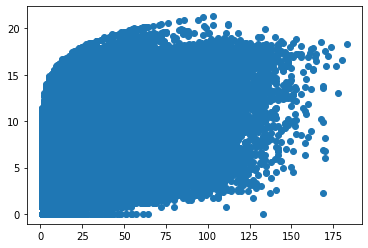

In [37]:
from scipy import stats
X = data2[['$ Spend']]
y = data2['# Impressions']
y,_ = stats.boxcox(y)
#X,_ = stats.boxcox(X)

y = pd.DataFrame({'# Impressions':y})
#X = pd.DataFrame({'$ Spend':X})

plt.scatter(X,y)

In [31]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                   Perf   R-squared:                       0.227
Model:                            OLS   Adj. R-squared:                  0.227
Method:                 Least Squares   F-statistic:                 1.112e+04
Date:                Tue, 14 Mar 2023   Prob (F-statistic):               0.00
Time:                        16:21:09   Log-Likelihood:            -2.6772e+06
No. Observations:              265388   AIC:                         5.354e+06
Df Residuals:                  265380   BIC:                         5.355e+06
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
polreg = LinearRegression()
polreg.fit(X_train_poly, y_train)

print('Train Score for polynomial Regression:', polreg.score(X_train_poly, y_train))
print('Test Score for polynomial Regression:', polreg.score(X_test_poly, y_test))

Train Score for polynomial Regression: 0.28405176184761494
Test Score for polynomial Regression: 0.28203248666644654


In [18]:
data2.drop(data2.columns[[0,1,2,3,5,6,7,8,11,12,13,14,15,16,17,18,19,20]], axis = 1, inplace=True)
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 265388 entries, 0 to 266303
Data columns (total 4 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Ad Digital Channel  265388 non-null  object 
 1   Audience Type       265388 non-null  object 
 2   $ Spend             265388 non-null  int64  
 3   Perf                265388 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 10.1+ MB


In [19]:
data_final = pd.get_dummies(data2, columns = ['Ad Digital Channel','Audience Type'])
data_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 265388 entries, 0 to 266303
Data columns (total 10 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   $ Spend                                  265388 non-null  int64  
 1   Perf                                     265388 non-null  float64
 2   Ad Digital Channel_Programmatic Display  265388 non-null  uint8  
 3   Ad Digital Channel_Search                265388 non-null  uint8  
 4   Ad Digital Channel_Social                265388 non-null  uint8  
 5   Audience Type_Audience Type 1            265388 non-null  uint8  
 6   Audience Type_Audience Type 2            265388 non-null  uint8  
 7   Audience Type_Audience Type 3            265388 non-null  uint8  
 8   Audience Type_Audience Type 4            265388 non-null  uint8  
 9   Audience Type_Audience Type 5            265388 non-null  uint8  
dtypes: float64(1), int64(1), uint8(8

In [20]:
#data_final.head()

In [21]:
y = data_final['Perf']
X = data_final.drop('Perf', axis=1)

In [22]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                   Perf   R-squared:                       0.227
Model:                            OLS   Adj. R-squared:                  0.227
Method:                 Least Squares   F-statistic:                 1.112e+04
Date:                Tue, 14 Mar 2023   Prob (F-statistic):               0.00
Time:                        16:20:53   Log-Likelihood:            -2.6772e+06
No. Observations:              265388   AIC:                         5.354e+06
Df Residuals:                  265380   BIC:                         5.355e+06
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [23]:

from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
    

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
#X_train = scalar.fit_transform(X_train)
#X_test = scalar.transform(X_test)

from sklearn.linear_model import LinearRegression
lreg = LinearRegression()
lreg.fit(X_train, y_train)
print('Train Score for Linear Regression:', lreg.score(X_train, y_train))
print('Test Score for Linear Regression:', lreg.score(X_test, y_test))

Train Score for Linear Regression: 0.22530303597944024
Test Score for Linear Regression: 0.23154294132825914


In [24]:

from sklearn.linear_model import LinearRegression
lreg = LinearRegression()
lreg.fit(X_train, y_train)
print('Train Score for Linear Regression:', lreg.score(X_train, y_train))
print('Test Score for Linear Regression:', lreg.score(X_test, y_test))

Train Score for Linear Regression: 0.22530303597944024
Test Score for Linear Regression: 0.23154294132825914


In [25]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
polreg = LinearRegression()
polreg.fit(X_train_poly, y_train)

print('Train Score for polynomial Regression:', polreg.score(X_train_poly, y_train))
print('Test Score for polynomial Regression:', polreg.score(X_test_poly, y_test))

Train Score for polynomial Regression: 0.314279517771881
Test Score for polynomial Regression: 0.32662650562118734


In [26]:
#Ridge(random_state = 0)
from sklearn.linear_model import Ridge

ridge = Ridge(random_state= 0)
ridge.fit(X_train, y_train)

print('Train Score for Ridge Regression:', ridge.score(X_train, y_train))
print('Test Score for Ridge Regression:', ridge.score(X_test, y_test))



Train Score for Ridge Regression: 0.2253044894446553
Test Score for Ridge Regression: 0.2315487075439071


In [27]:
#Lasso(random_state = 0)
from sklearn.linear_model import Lasso

lasso = Lasso(random_state= 0)
lasso.fit(X_train, y_train)

print('Train Score for Lasso Regression:', lasso.score(X_train, y_train))
print('Test Score for Lasso Regression:', lasso.score(X_test, y_test))

Train Score for Lasso Regression: 0.22530365415903397
Test Score for Lasso Regression: 0.23156716823476697


In [28]:
#DecisionTreeRegressor(max_depth = 2, random_state= 0)
from sklearn.tree import DecisionTreeRegressor
dr = DecisionTreeRegressor(max_depth = 2, random_state= 0)
dr.fit(X_train, y_train)

print('Train Score for Decision Tree Regression:', dr.score(X_train, y_train))
print('Test Score for Decision Tree Regression:', dr.score(X_test, y_test))

Train Score for Decision Tree Regression: 0.23602454319879984
Test Score for Decision Tree Regression: 0.24413061446269213


In [29]:
# from sklearn.neighbors import KNeighborsRegressor
# knn = KNeighborsRegressor()
# knn.fit(X_train, y_train)

# print('Train Score for KNN Regression:', knn.score(X_train, y_train))
# print('Test Score for KNN Regression:', knn.score(X_test, y_test))

In [30]:
import xgboost as xg

xgb_r = xg.XGBRegressor(objective ='reg:linear',
                  n_estimators = 10, seed = 123)  
# Fitting the model
xgb_r.fit(X_train, y_train)

print('Train Score for XGBoost linear Regression:', xgb_r.score(X_train, y_train))
print('Test Score for XGBoost linear Regression:', xgb_r.score(X_test, y_test))

[16:21:03] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
Train Score for XGBoost linear Regression: 0.32919051311576075
Test Score for XGBoost linear Regression: 0.32960012166699326
